# Introduction

The dataset is TMDB Movies Dataset.
This datset contains 10000 observations of movies including title, revenue, cast, director, tagline, keywords, genres, release date, runtime etc.

Data Science Questions:
1. Does higher budget mean higher popularity? Is there a coefficient relationship?
2. Will the runtime affect the vote count and popularity?
4. What features are associated with Top 10 Revenue Movies?
5. Which genres are most popular from year to year?

# Importing Necessary Library and packages

In [166]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import datetime
import os
import random

In [130]:
os.chdir('E:/IIUM assignments/Semester 6 Projects and Assignments/Big Data/Individual Assignment')

# Reading the Dataset and Exploring

In [131]:
df = pd.read_csv('tmdb_movies_data.csv')

In [132]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [133]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [134]:
len(df)

10866

rows x columns

In [135]:
df.shape

(10866, 21)

Unique values in each columns

In [136]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Statistical values of the dataset

In [137]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Checking null values

In [138]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [139]:
df.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# Data Wrangling

Drop unnecessary columns

In [140]:
df.drop(['id','imdb_id','homepage','overview','keywords'],axis=1,inplace=True)

Handling missing data

In [141]:
df = df[pd.notnull(df['cast'])]
df = df[pd.notnull(df['director'])]
df = df[pd.notnull(df['genres'])] 
df['production_companies'].fillna('missing',inplace=True) #object datatype
df['tagline'].fillna('missing',inplace=True)
df['budget'].replace(0,np.nan,inplace=True)
df['revenue'].replace(0,np.nan,inplace=True)
df['runtime'].replace(0,np.nan,inplace=True)

Drop Duplicates

In [142]:
df.duplicated().sum()

1

In [143]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Data Visualization

Visualize each variables

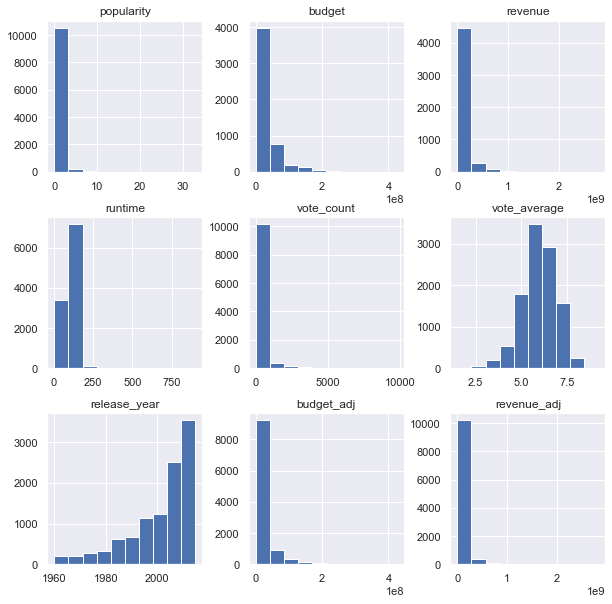

In [144]:
df.hist(figsize=(10,10));

Question 1: Does higher budget mean higher popularity? Is there a coefficient relationship?

Text(0, 0.5, 'Popularity')

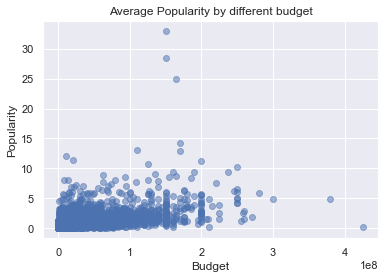

In [217]:
#plot the relation between budget and popularity
x = df['budget']
y = df['popularity']

plt.scatter(x,y,alpha=0.5)
plt.title('Average Popularity by different budget')
plt.xlabel('Budget')
plt.ylabel('Popularity')

We can not see very strong relatioship between the budget and the popularity from above plot. Let's try to compare the data in another way: create two groups based on median value of budget.

In [146]:
#based on median budget value to divide the budget into two groups: low and high
m = df['budget'].median()
low_budget = df.query('budget < {}'.format(m))
high_budget = df.query('budget >= {}'.format(m))

In [147]:
#check low and high budget mean values respectively
mean_low_budget = low_budget['popularity'].mean()
mean_high_budget = high_budget['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

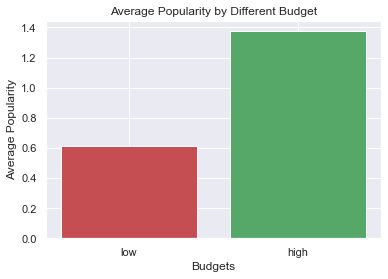

In [148]:
x = [1,2]
y = [mean_low_budget,mean_high_budget]
labels = ['low','high']
plt.bar(x, y, tick_label=labels,color=['r','g'])
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

In [149]:
gain = (mean_high_budget-mean_low_budget)/mean_high_budget*100
gain

55.356675476470976

Conclusion: We can conclude that movies wih higher budget has chance to have higher popularity. They gain 50% more popularity than low budget movies!

Question 2: Will the runtime affect the vote count and popularity?

In [150]:
short_m = df.query('runtime <= {}'.format(60)) #runtime less than or equal to 60m
medium_m = df.query('runtime <= {}'.format(120)) #runtime less than or equal to 120m
long_m = df.query('runtime > {}'.format(120)) #runtime more than 120m

In [151]:
# check mean popularity of different movie lengths 
mean_short_m = short_m['popularity'].mean()
mean_medium_m = medium_m['popularity'].mean()
mean_long_m = long_m['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

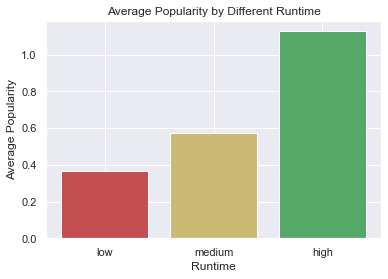

In [152]:
x = [1,2,3]
y = [mean_short_m, mean_medium_m, mean_long_m]
labels=['low','medium','high']
plt.bar(x, y, tick_label = labels, color=['r','y','g'])
plt.title('Average Popularity by Different Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')

From the above barplot, we can see that movies with high runime (>120) tend to gain more popularity. Lets try another method to visualize.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime', ylabel='popularity'>

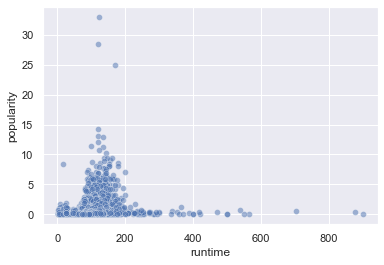

In [153]:
#Scatterplot
sns.set()
sns.scatterplot(df['runtime'], df['popularity'],alpha=0.5)

Conclusion: Combining both plots above, movies with runtime higher than 120m may have higher popularity but after going above 200m the popularity drops. So, if the movies are within 200 minutes,it will be more popular. Once the movies run over 200 minutes, it's hard for them to gain high popularity

Question 3: What features are associated with Top 10 Revenue Movies?

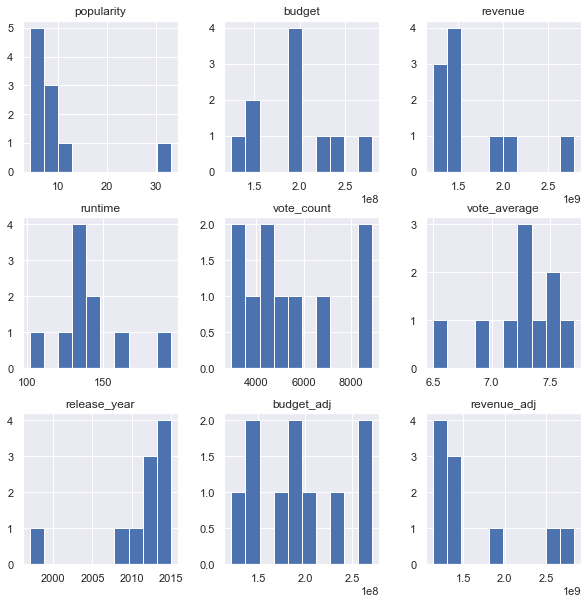

In [154]:
top10_rev = df.nlargest(10,'revenue')
top10_rev.hist(figsize=(10,10));

Question 4: Which genres are most popular from year to year?

In [155]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10731, dtype: object

In [156]:
#we need to extract individual genres
data = pd.Series(df['genres'].str.cat(sep='|').split('|'))
count = data.value_counts(ascending=False)
df_genre_counts = pd.DataFrame({'genres':count.index, 'count':count.values})

In [157]:
df_genre_counts

,genres,count
0,Drama,4746
1,Comedy,3775
2,Thriller,2902
3,Action,2376
4,Romance,1708
5,Horror,1636
6,Adventure,1465
7,Crime,1353
8,Science Fiction,1221
9,Family,1214


In [169]:
x = df_genre_counts.groupby('genres')['count'].mean().sort_values()

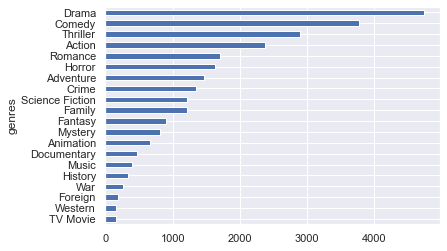

In [175]:
x.plot(kind='barh');

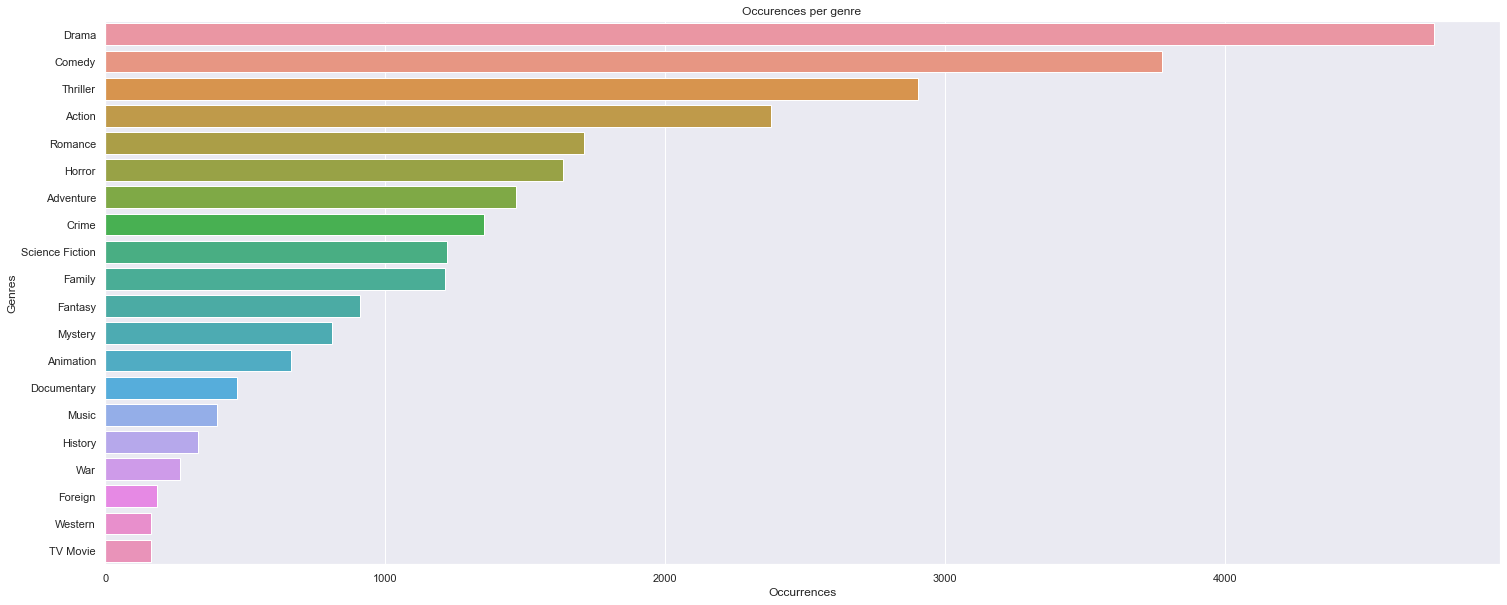

In [177]:
#make it more attractive using Seaborn
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x = 'count', y = 'genres', data=df_genre_counts)
ax.set_title('Occurences per genre ')
ax.set_xlabel('Occurrences')
ax.set_ylabel('Genres')
plt.show()

<AxesSubplot:title={'center':'Number of Movies Released Each Year'}, xlabel='year', ylabel='number of movies'>

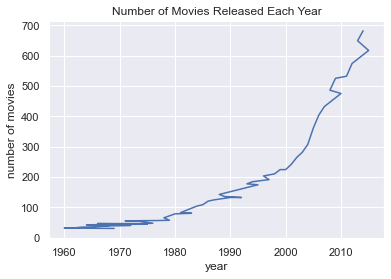

In [178]:
movie_count = df['release_year'].value_counts()
movie_count.plot(xlabel='year',ylabel='number of movies',title='Number of Movies Released Each Year')

From above two plots, we can see that indiviual popular movie genres are Drama, Comedy, Thriller, Action, Romance and the number of movies increased along the time.

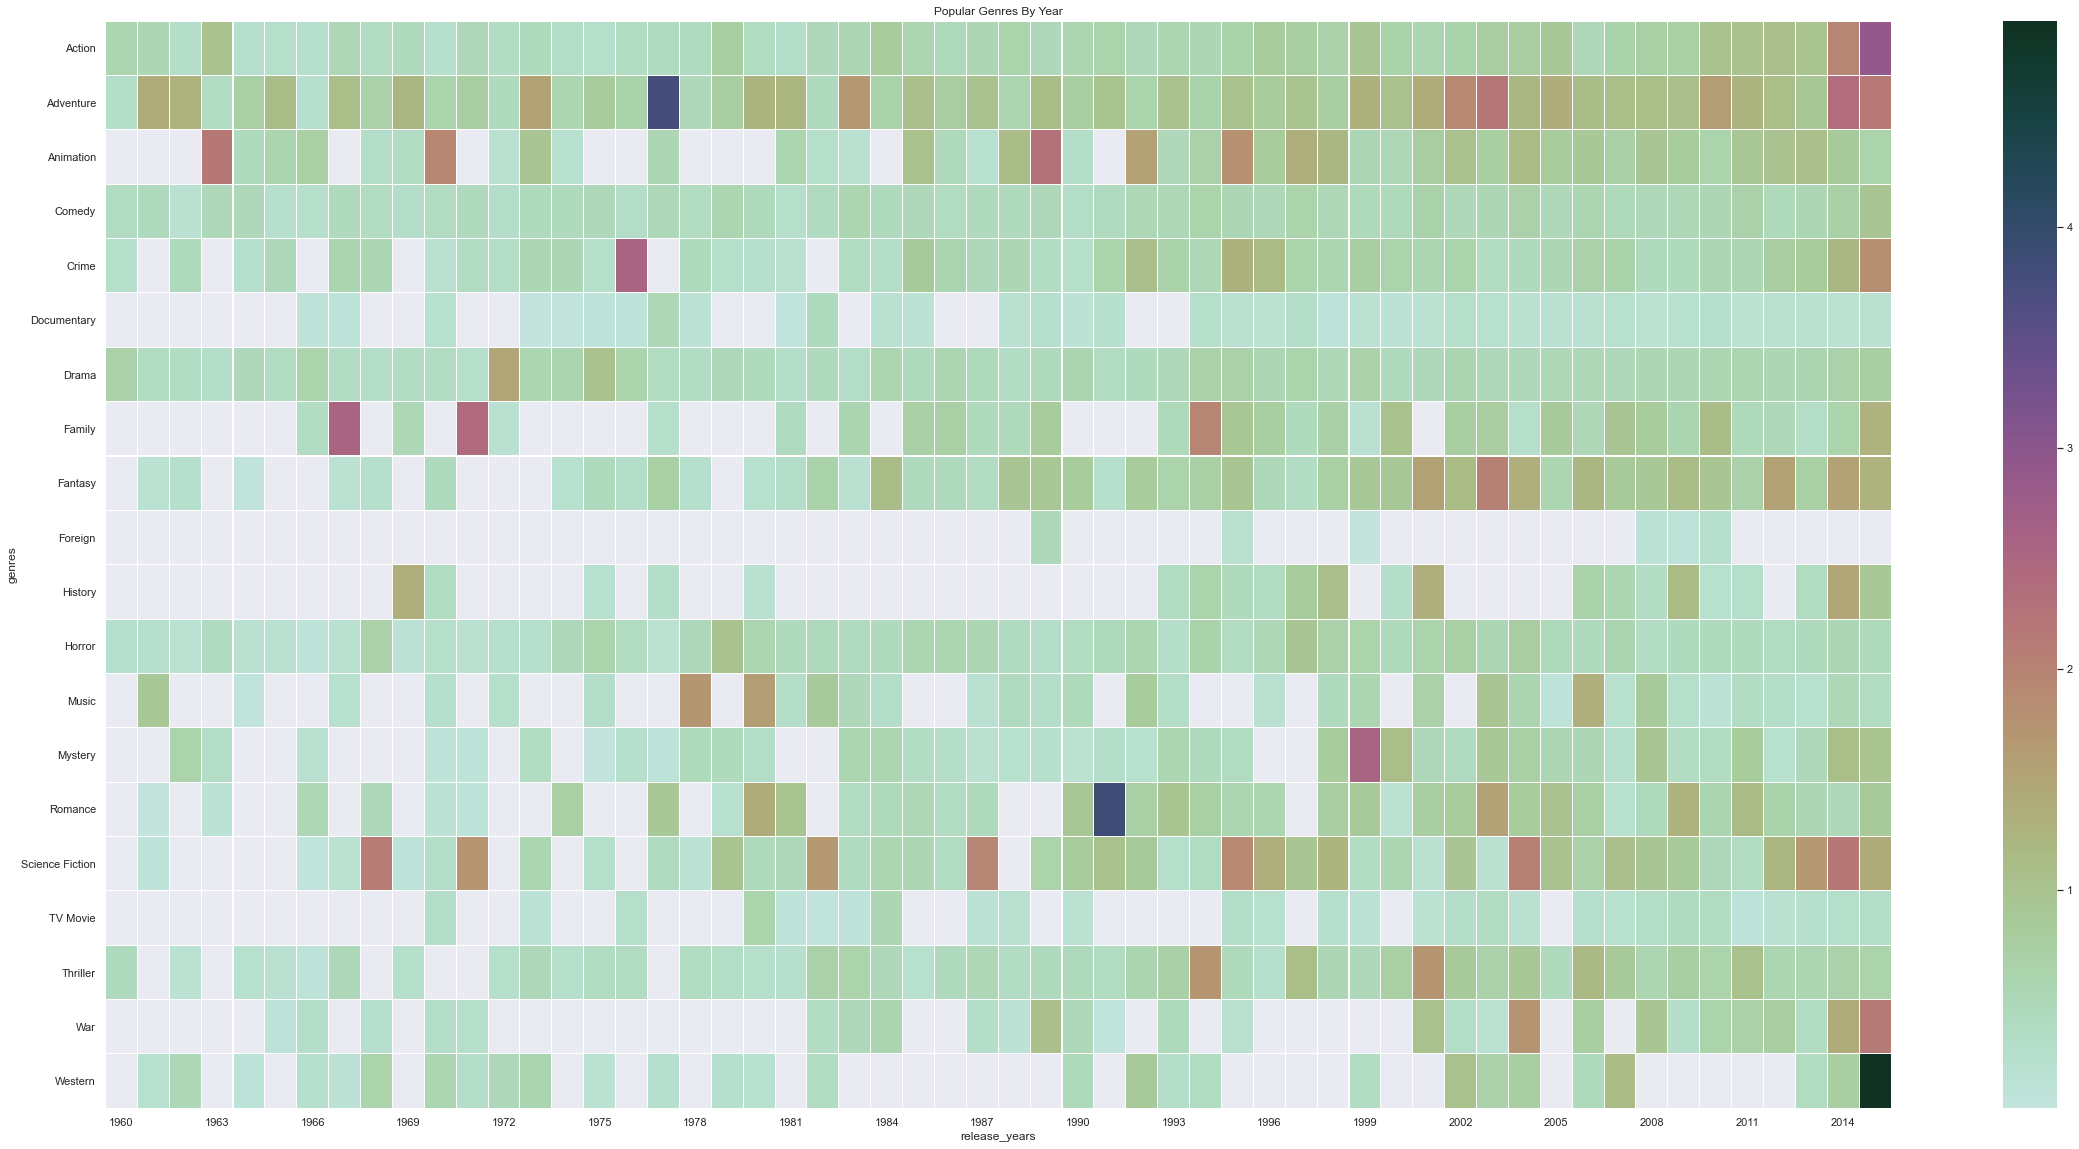

In [188]:
#As the 'genre' column is concatanation multiple genre, we are going to take just the first genre for each movie and plot all the genre types for each year by popularity
df['genre'] =  df['genres'].apply(lambda x: x.split('|')[0])
genre_year = df.groupby(['genre', 'release_year']).mean().sort_index()
df_popular = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='popularity', aggfunc=np.mean)
f, axA = plt.subplots(figsize=(40, 20), nrows=1)
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
sns.heatmap(df_popular, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axA)
axA.set_title('Popular Genres By Year')
axA.set_xlabel('release_years')
axA.set_ylabel('genres')
plt.show()

From above two heatmaps, we can see a wide range of movie genres to choose from 1980(concentration has increased from this era) to 2014.

# Other Visualizations

In [190]:
def find_min_max(col_name):
    #using idxmin()  and idxmax() functions to find min and max value of the given column.
    #idxmin to find the index of lowest in given col_name
    min_index = df[col_name].idxmin()
    #idxmax to find the index of highest in given col_name
    max_index = df[col_name].idxmax()
    #select the lowest and hisghest value from given col_name
    low  = pd.DataFrame(df.loc[min_index,:])
    high = pd.DataFrame(df.loc[max_index,:])
    #Print the results
    
    print('Movie which has highest '+col_name+' : ', df['original_title'][max_index])
    print('Movie which has lowest '+col_name+' : ', df['original_title'][min_index])
    return pd.concat([high,low], axis=1)

Most Popular Movie Details

In [197]:
pop_m = df['popularity'].idxmax() #returns index of first occurrence of maximum over requested axis
movie_details = pd.DataFrame(df.loc[pop_m,:])
print('Most popular Movie ',df['original_title'][pop_m])
movie_details

Most popular Movie  Jurassic World


,0
popularity,32.9858
budget,1.5e+08
revenue,1.51353e+09
original_title,Jurassic World
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director,Colin Trevorrow
tagline,The park is open.
runtime,124
genres,Action|Adventure|Science Fiction|Thriller
production_companies,Universal Studios|Amblin Entertainment|Legenda...


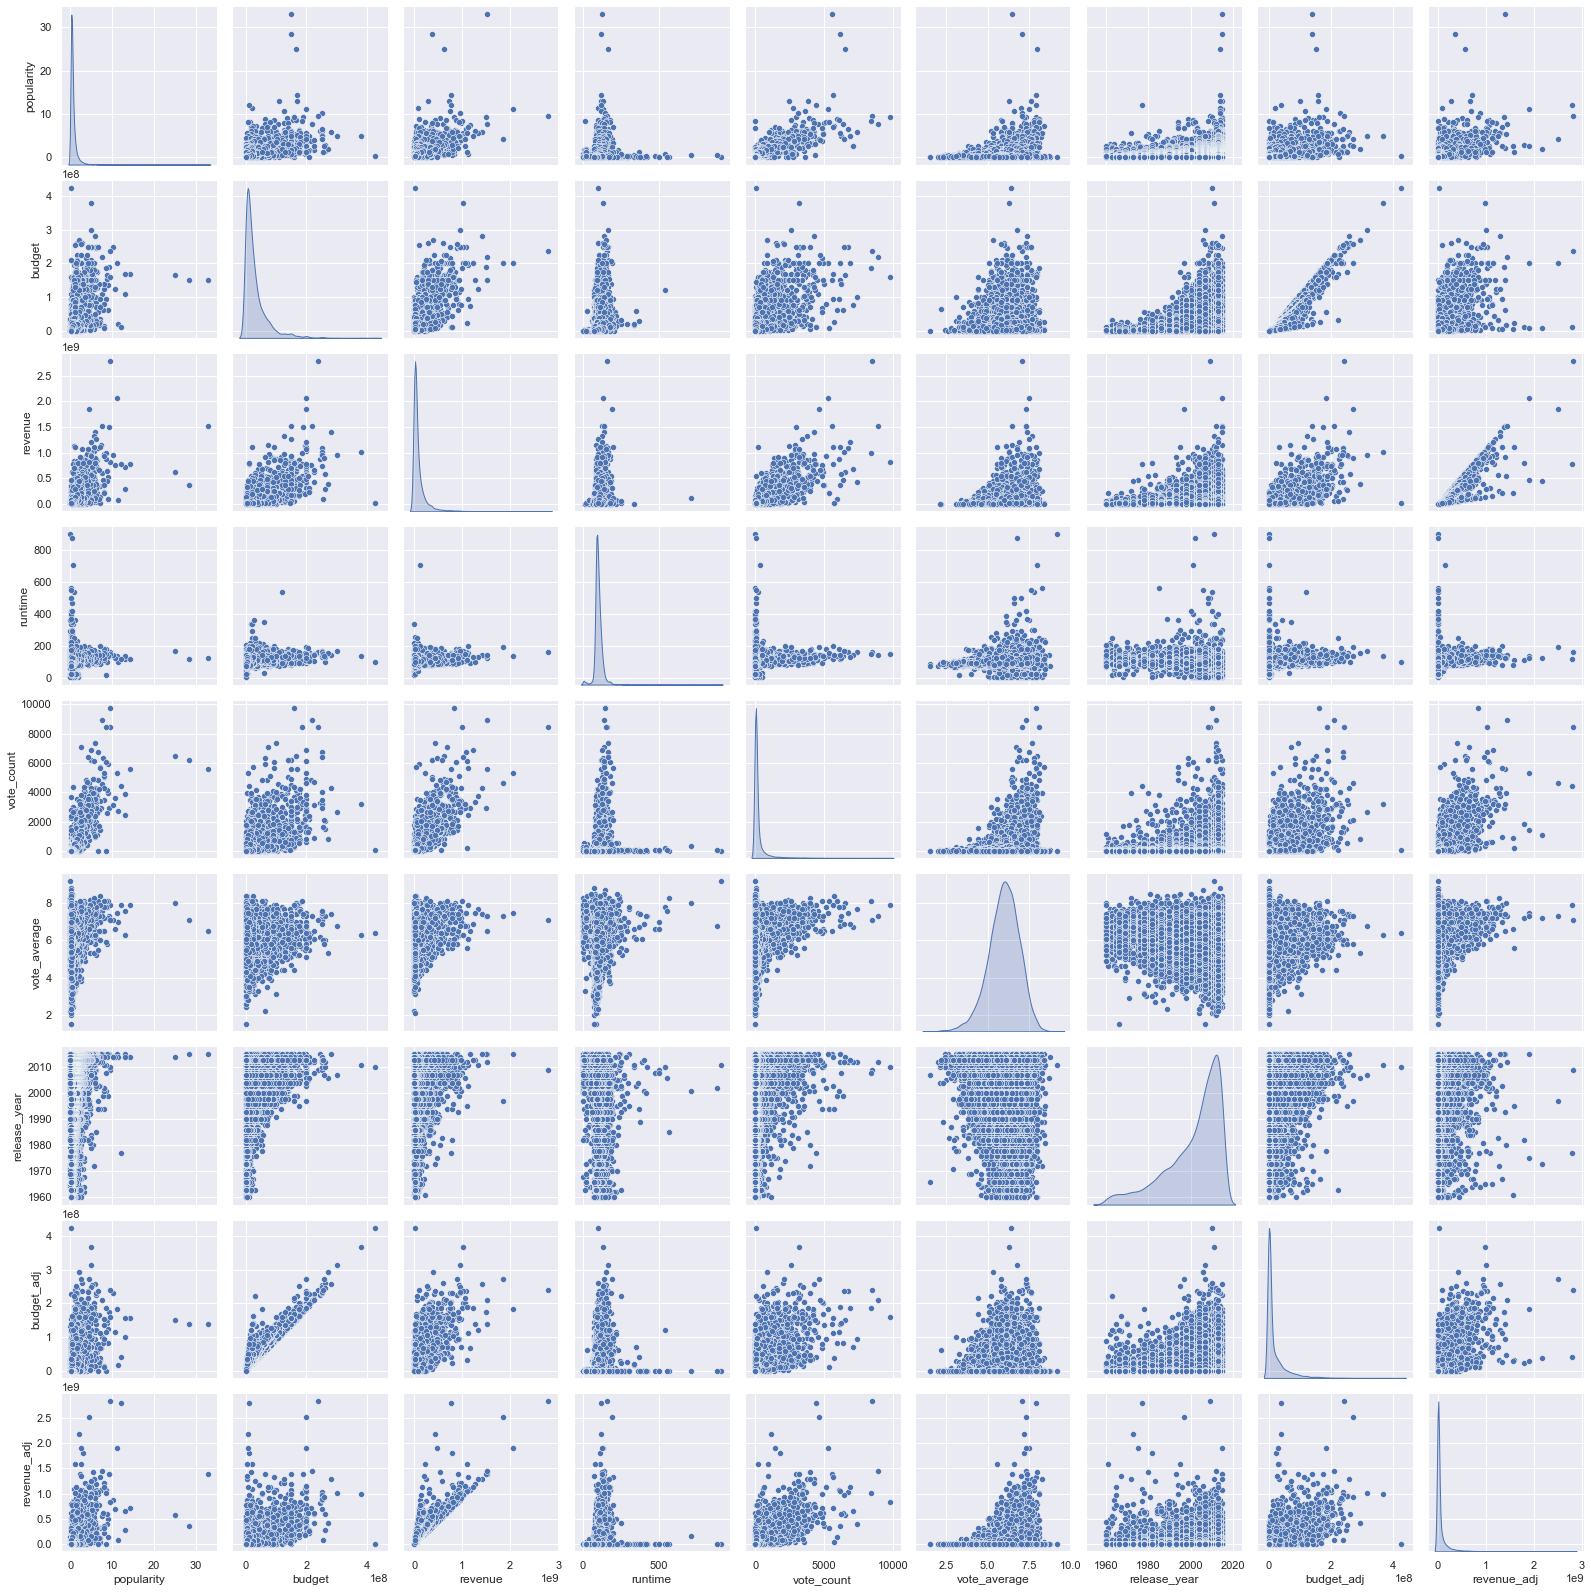

In [216]:
#Correlation between variables
sns.pairplot(df,diag_kind="kde")

# Conclusion

Based on the analysis we did above - 
* We get more genres to choose from as the movies released as the runtime, budget and revenue increases.
* Movies popularity in general is increasing over time, but as it increases the most popular genres are nearly the same every decade with Drama on the top; people tend to prefer Drama, Comedy, Thriller, Action, Romance.

# References

1. https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
2. https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e
3. https://pythonbasics.org/seaborn-pairplot/
4. https://pynative.com/python-matplotlib-exercise/
